In [5]:
#Load some usefull libraries
library(anytime)
library(tidyverse)
library(plyr)
library()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact



# About the dataset in this directory 

The file "Avian_Influenza.csv" is a dataset containing the wild birds tested for Avian influenza from 2016-01-01 and forward at SVA. It is encoded in UTF-8 and has 6 columns separated by ";". The columns are as follows:

|Variable|Description|
|--------|-----------|
|species|The Swedish name of the bird species tested|
|result	|0 for negative and 1 for positive for Avian Influenza|
|ViltID	|An animal identifier|
|Ankomstdatum|	The date the bird arrived at the lab|
|coords.x1|	The longitude in WGS84 decimal degrees (epsg:4326)|
|coords.x2|	The latitude in WGS84 decimal degrees (epsg:4326)|

# Load the data: 

In [6]:
MyData <- read.csv(file="data/Avian_Influenza.csv", header=TRUE, sep=";")

Have a first look at what the data looks like.

In [7]:
nrow(MyData)
MyData
summary(MyData)

[1] 1074

species,result,ViltID,Ankomstdatum,coords.x1,coords.x2
<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>
Ormvråk,0,VLT 47/17,2017-01-10,13.32369,55.48586
Gräsand,0,VLT 260/17,2017-01-27,17.01847,59.36207
Sångsvan,0,VLT 1032/17,2017-03-07,18.21285,59.60018
Kråka,0,VLT 1405/17,2017-04-21,12.85264,55.40810
Sparvhök,0,VLT 1418/17,2017-04-25,17.62222,59.87742
Kattuggla,0,VLT 1492/17,2017-05-04,14.00019,57.57155
Kungsörn,0,VLT 1697/17,2017-05-30,12.66406,59.72551
Grönfink,0,VLT 2091/17,2017-08-17,17.91793,58.94981
Skata,0,VLT 3043/17,2017-12-06,13.22750,55.72271


      species        result                                 ViltID    
 Havsörn  :220   Min.   :0.00000   A, VLT 626/18               :   1  
 Stadsduva: 67   1st Qu.:0.00000   acc.nr.20176183, VLT 2425/17:   1  
 Ormvråk  : 52   Median :0.00000   acc.nr.20176189, VLT 2424/17:   1  
 Gräsand  : 48   Mean   :0.06983   B, VLT 627/18               :   1  
 Kaja     : 46   3rd Qu.:0.00000   VLT 1/17                    :   1  
 Kattuggla: 44   Max.   :2.00000   VLT 1/19                    :   1  
 (Other)  :597                     (Other)                     :1068  
     Ankomstdatum   coords.x1       coords.x2    
 2018-04-24: 19   Min.   :11.11   Min.   :55.37  
 2018-03-28: 14   1st Qu.:14.04   1st Qu.:57.50  
 2017-02-01: 13   Median :16.49   Median :59.33  
 2017-11-14: 12   Mean   :16.11   Mean   :59.35  
 2018-03-16: 12   3rd Qu.:17.74   3rd Qu.:60.53  
 2018-09-27: 12   Max.   :23.67   Max.   :68.34  
 (Other)   :992                                  

Notice that feature **result** ought to be catecorical or a *factor*. The category **result** also contiains three different values: 0, 1 and 2. The values 0 and 1 were expected from the description, the value 2 is however unknown. The feture **Ankomstdatum** ought to be of date-time typ. Lets fix that. 

In [8]:
MyData$Ankomstdatum <- anytime::anydate(MyData$Ankomstdatum)
MyData$result <- as.factor(MyData$result)
MyData$result <- mapvalues(MyData$result, from = c("0", "1", "2"), to = c("Negative", "Positive", "Unknown"))

In [9]:
summary(MyData)

      species         result                              ViltID    
 Havsörn  :220   Negative:1009   A, VLT 626/18               :   1  
 Stadsduva: 67   Positive:  55   acc.nr.20176183, VLT 2425/17:   1  
 Ormvråk  : 52   Unknown :  10   acc.nr.20176189, VLT 2424/17:   1  
 Gräsand  : 48                   B, VLT 627/18               :   1  
 Kaja     : 46                   VLT 1/17                    :   1  
 Kattuggla: 44                   VLT 1/19                    :   1  
 (Other)  :597                   (Other)                     :1068  
  Ankomstdatum          coords.x1       coords.x2    
 Min.   :2017-01-02   Min.   :11.11   Min.   :55.37  
 1st Qu.:2017-06-28   1st Qu.:14.04   1st Qu.:57.50  
 Median :2018-03-21   Median :16.49   Median :59.33  
 Mean   :2018-02-27   Mean   :16.11   Mean   :59.35  
 3rd Qu.:2018-10-19   3rd Qu.:17.74   3rd Qu.:60.53  
 Max.   :2019-06-07   Max.   :23.67   Max.   :68.34  
                                                     

Everything seems ok. Now, Lets have a look if there are any strange values in the data.

In [10]:
df_status(MyData)

ERROR: Error in df_status(MyData): could not find function "df_status"


Nothing strange to note here. The number of Unique **ViltID** is the same as the number of rows in the table, as to be expected. Lets have a look at the different species found in the data.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Havsörn,220,20.48,20.48
Stadsduva,67,6.24,26.72
Ormvråk,52,4.84,31.56
Gräsand,48,4.47,36.03
Kaja,46,4.28,40.31
Kattuggla,44,4.10,44.41
Knölsvan,44,4.10,48.51
Lappuggla,44,4.10,52.61
Slaguggla,42,3.91,56.52


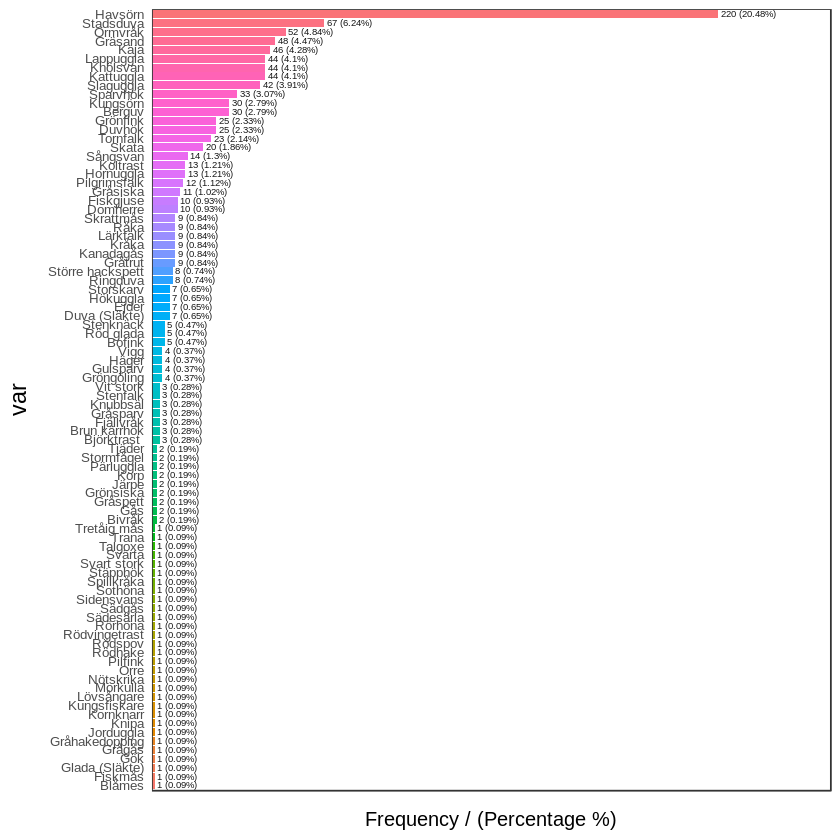

In [178]:
freq(MyData$species)

Now lets see the number of birds marked as positive for each species.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Havsörn,20,36.36,36.36
Knölsvan,15,27.27,63.63
Ormvråk,5,9.09,72.72
Gräsand,4,7.27,79.99
Duvhök,3,5.45,85.44
Pilgrimsfalk,3,5.45,90.89
Gås,2,3.64,94.53
Kråka,1,1.82,96.35
Råka,1,1.82,98.17


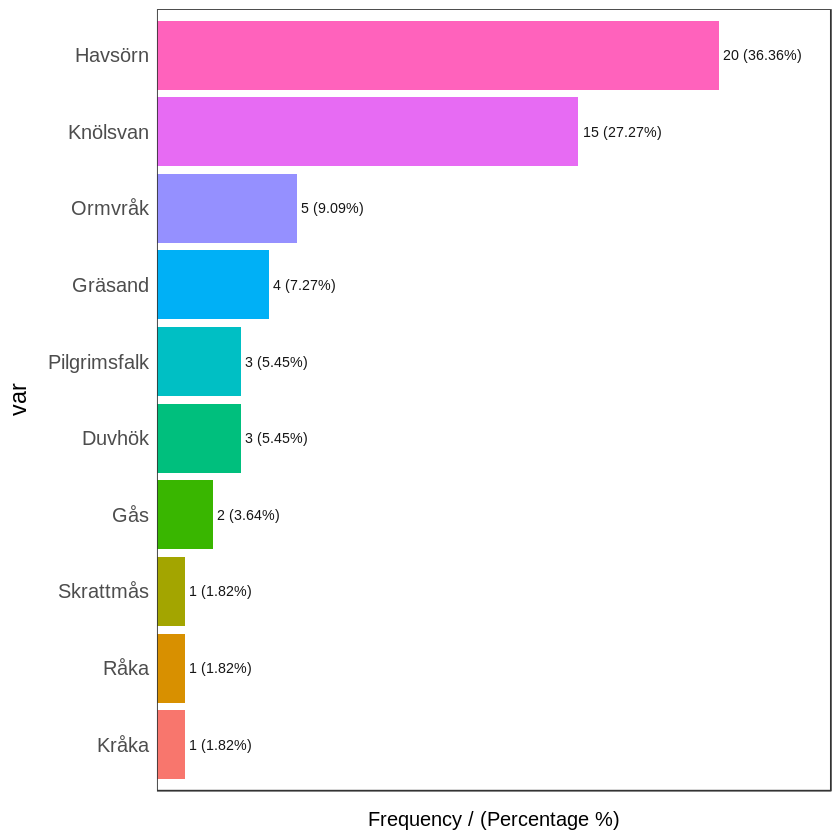

In [179]:
freq(subset(MyData, result == "Positive")$species)

Lets see how the total number of each species compare to the number of positive results. Here this is done by counting the occrances in both cases and merging (inner join) the dataframes on ***species***. After the merge the ratio is calculated.

In [180]:
df_positive <- count(subset(MyData, result == "Positive")$species)
df_all <- count(subset(MyData)$species)
df_inner <- merge(df_positive,df_all, by = "x")
df_inner$ratio <- df_inner$freq.x / df_inner$freq.y
df_inner

x,freq.x,freq.y,ratio
<fct>,<int>,<int>,<dbl>
Duvhök,3,25,0.12000000
Gås,2,2,1.00000000
Gräsand,4,48,0.08333333
Havsörn,20,220,0.09090909
Knölsvan,15,44,0.34090909
Kråka,1,9,0.11111111
Ormvråk,5,52,0.09615385
Pilgrimsfalk,3,12,0.25000000
Råka,1,9,0.11111111


To get an object that is simpler to quickly interprete than a table a bar chart can be used.

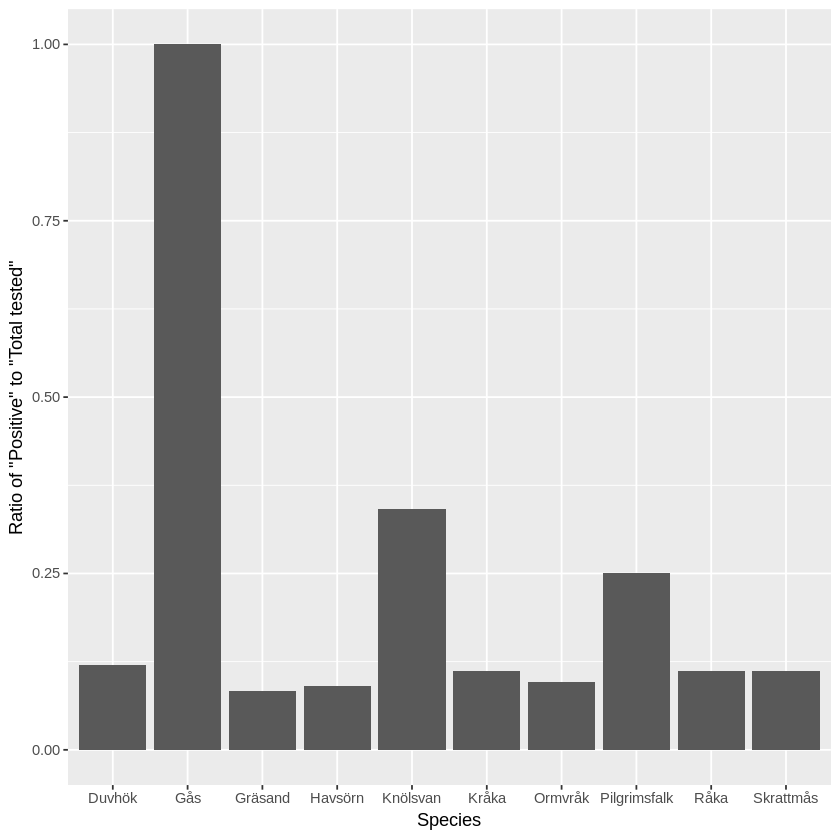

In [181]:
ggplot(df_inner, aes(x=x,y = ratio)) +geom_bar(stat = "identity")+
    labs(x = "Species", y = "Ratio of \"Positive\" to \"Total tested\"")


The ratio plot does not show the relationship between the absolute numbers of positive results to total arivals, which can be informative. Lets plot the total numbers side by side. 

In [182]:
df_inner <- gather(df_inner, event, total,freq.x:freq.y) 
df_inner

x,ratio,event,total
<fct>,<dbl>,<chr>,<int>
Duvhök,0.12000000,freq.x,3
Gås,1.00000000,freq.x,2
Gräsand,0.08333333,freq.x,4
Havsörn,0.09090909,freq.x,20
Knölsvan,0.34090909,freq.x,15
Kråka,0.11111111,freq.x,1
Ormvråk,0.09615385,freq.x,5
Pilgrimsfalk,0.25000000,freq.x,3
Råka,0.11111111,freq.x,1


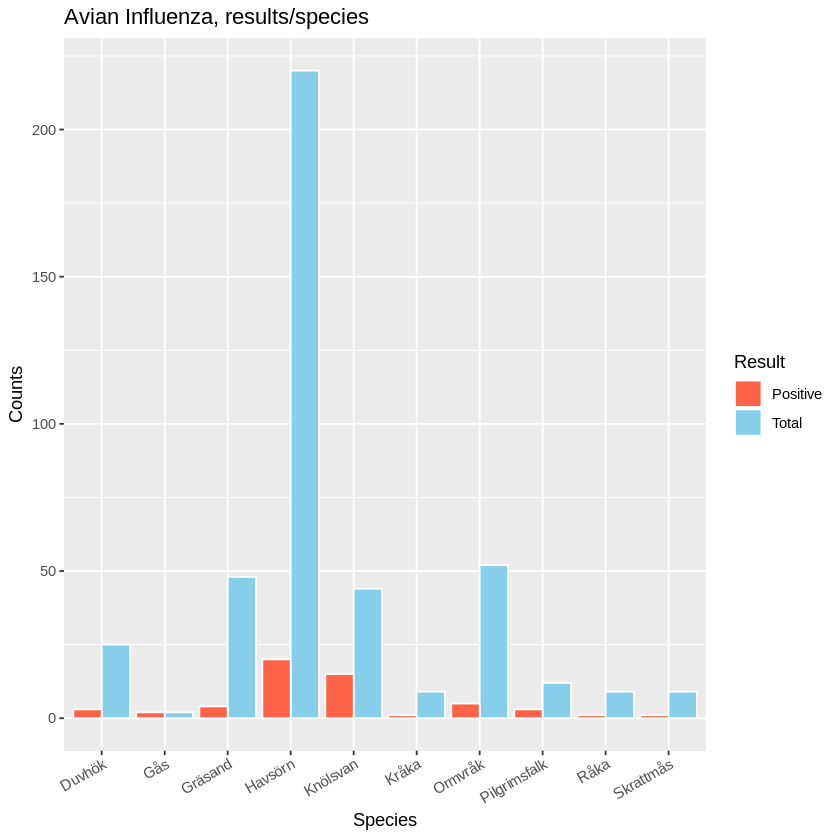

In [183]:
ggplot(df_inner)+
geom_bar(stat="identity",position = "dodge",color = "white", aes(x=x, y = total, fill = event))+
    scale_fill_manual(values = c("tomato","skyblue"), name="Result", labels=c("Positive","Total"))+ 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))+
    labs(title = "Avian Influenza, results/species", x = "Species", y = "Counts")  

# Geografical distribution of samples

To get a better picture of where the samples were collected we can plot the coordinates in the data on a map. To include result information, different markers are used for each result class. 

In [184]:
library(maps)

In [185]:
SWE <- map_data("world") %>% filter(region=="Sweden")

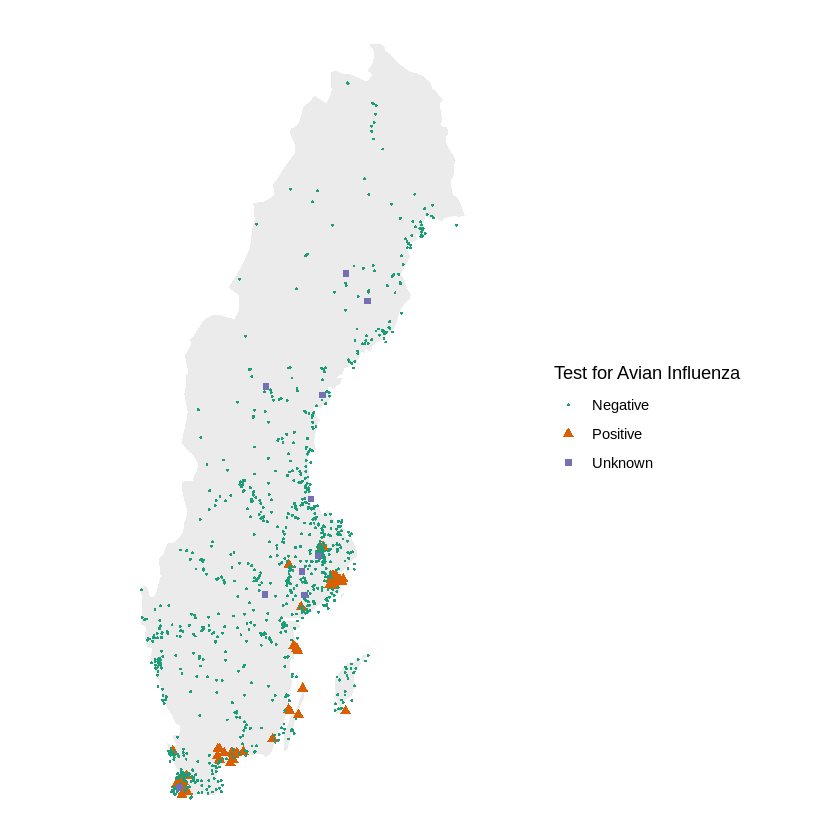

In [186]:
g1 <- ggplot() + geom_polygon(data = SWE, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3) +
  geom_point( data=MyData,position=position_jitter(h=0.1, w=0.1), 
             aes(x=coords.x1, y=coords.x2, colour = result, shape = result, size = result)) +
  scale_colour_brewer(palette = "Dark2")+
  scale_size_manual(values=c(0.5, 2, 1.5))+
  labs(colour = "Test for Avian Influenza",
       size = "Test for Avian Influenza",
       shape = "Test for Avian Influenza") +
  theme_void() + coord_map("albers",lat0=50, lat1=70)
plot(g1)

# Time information of sample arrivals

Knowing when samples arrived to the lab can also be interesting so lets plot the number of arrivals for each week duirng the total time period covered by the data set.

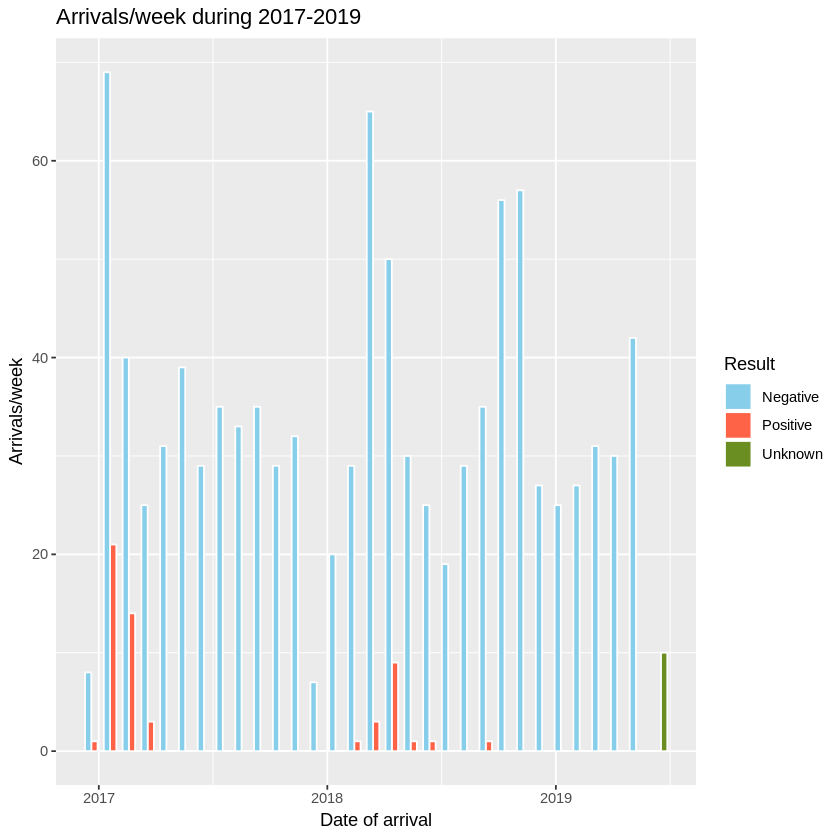

In [187]:
ggplot(MyData, aes(x=Ankomstdatum, group=result, fill = result)) + 
      geom_histogram(binwidth=30,position = "dodge", color ="white") +
     scale_fill_manual(values = c("skyblue","tomato", "olivedrab"), name="Result")+ 
      ylab("Arrivals/week") + 
      xlab("Date of arrival") + 
      ggtitle("Arrivals/week during 2017-2019")